In [45]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [46]:
df = pd.read_csv("E:\\Feature engineering\\Datasets\\titanic.csv" , usecols = ['Age','Fare','Survived'])

In [47]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [48]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [49]:
## using KNN Impute technique 

In [50]:
from sklearn.impute import KNNImputer

In [51]:
reg = KNNImputer(
    n_neighbors=5,
    weights='distance',
    metric='nan_euclidean',
    copy=True,
    add_indicator=False,)

In [52]:
reg.fit(df)

KNNImputer(weights='distance')

In [53]:
df_1 = reg.transform(df)

In [54]:
df_1

array([[ 0.    , 34.5   ,  7.8292],
       [ 1.    , 47.    ,  7.    ],
       [ 0.    , 62.    ,  9.6875],
       ...,
       [ 0.    , 38.5   ,  7.25  ],
       [ 0.    , 31.3   ,  8.05  ],
       [ 0.    , 60.5   , 22.3583]])

In [55]:
df_1 = pd.DataFrame(df_1 , columns = df.columns)

In [56]:
df_1.head()

,Survived,Age,Fare
0,0.0,34.5,7.8292
1,1.0,47.0,7.0000
2,0.0,62.0,9.6875
3,0.0,27.0,8.6625
4,1.0,22.0,12.2875


In [57]:
df_1.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [58]:
df[df['Fare'].isnull()]['Fare']

152   NaN
Name: Fare, dtype: float64

In [60]:
df_1[df['Fare'].isnull()]['Fare']

152    8.95334
Name: Fare, dtype: float64

In [63]:
df[df['Age'].isnull()]['Age'][:5]

10   NaN
22   NaN
29   NaN
33   NaN
36   NaN
Name: Age, dtype: float64

In [64]:
df_1[df['Age'].isnull()]['Age'][:5]

10    31.900000
22    35.868618
29    60.500000
33    21.912361
36    20.500000
Name: Age, dtype: float64

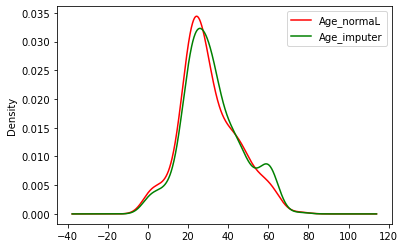

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df['Age'].plot(kind = 'kde',color = 'r',label = 'Age_normaL')
df_1['Age'].plot(kind = 'kde',color = 'g',label = 'Age_imputer')


plt.legend(loc = 0)

plt.show()

### using Feature engine 

In [79]:
df = pd.read_csv("E:\\Feature engineering\\Datasets\\titanic.csv" , usecols = ['Age','Fare','Survived'])

In [80]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [81]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [82]:
from feature_engine.wrappers import SklearnTransformerWrapper

In [83]:
reg = SklearnTransformerWrapper(transformer=KNNImputer(n_neighbors=5,
    weights='distance',
    metric='nan_euclidean',
    copy=True,
    add_indicator=False))

In [84]:
reg.fit(df)

SklearnTransformerWrapper(transformer=KNNImputer(weights='distance'))

In [85]:
df_2 = reg.transform(df)

In [86]:
df_2.head()

,Survived,Age,Fare
0,0.0,34.5,7.8292
1,1.0,47.0,7.0000
2,0.0,62.0,9.6875
3,0.0,27.0,8.6625
4,1.0,22.0,12.2875


In [87]:
df_2.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [88]:
df[df['Age'].isnull()]['Age'][:5]

10   NaN
22   NaN
29   NaN
33   NaN
36   NaN
Name: Age, dtype: float64

In [89]:
df_2[df['Age'].isnull()]['Age'][:5]

10    31.900000
22    35.868618
29    60.500000
33    21.912361
36    20.500000
Name: Age, dtype: float64

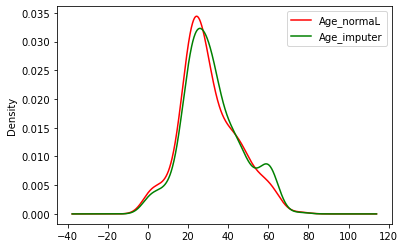

In [90]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df['Age'].plot(kind = 'kde',color = 'r',label = 'Age_normaL')
df_2['Age'].plot(kind = 'kde',color = 'g',label = 'Age_imputer')


plt.legend(loc = 0)

plt.show()